In [1]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
import math
import numpy as np
from pylab import rcParams
import matplotlib
from numpy import trapz
import pandas as pd

In [2]:
rcParams["figure.figsize"]=10, 2.5
matplotlib.rcParams["figure.facecolor"] = "0.9"
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["font.size"] = 15

In [3]:
NMR= pd.read_csv("./PUZ-489-ReT-DMF.csv", header = None, skiprows = 0, sep = "\t")

In [4]:
NMR.columns = ["CS", "intensity", "1"]
print(NMR)

             CS  intensity   1
0      -5.01711   0.036193 NaN
1      -5.01673   0.134954 NaN
2      -5.01634   0.040049 NaN
3      -5.01596   0.210862 NaN
4      -5.01558   0.458483 NaN
...         ...        ...  ..
52413  15.01980  -1.363410 NaN
52414  15.02020  -1.755910 NaN
52415  15.02060  -1.379940 NaN
52416  15.02100  -0.902532 NaN
52417  15.02140  -0.653245 NaN

[52418 rows x 3 columns]


In [18]:
#integeration minimum chemcial shift value of DCM
P1 = [n for n, i in enumerate (NMR.CS) if i>5.48][0]
print("P1 =", P1)
P2 = [n for n, i in enumerate (NMR.CS) if i>5.53][0]
print("P2 =", P2)

P1 = 27459
P2 = 27590


In [19]:
Average_P1 = (NMR.intensity[P1-2]+NMR.intensity[P1-1]+NMR.intensity[P1]+NMR.intensity[P1+1]+NMR.intensity[P1+2])/5
Average_P2 = (NMR.intensity[P2-2]+NMR.intensity[P2-1]+NMR.intensity[P2]+NMR.intensity[P2+1]+NMR.intensity[P2+2])/5
Intensity_min_DCM = (Average_P1+Average_P2)/2
NMR_intensity_corr_DCM = NMR.intensity-Intensity_min_DCM

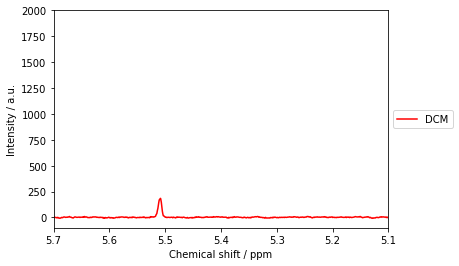

In [20]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_DCM, "r", label='DCM')
ax.set_xlim(5.7, 5.1)
ax.set_ylim(-100, 2000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [21]:
Peak_int_NMR_DCM = trapz (NMR_intensity_corr_DCM[P1:P2], dx = 1)
print("DCM peak area =", Peak_int_NMR_DCM)

DCM peak area = 3905.9051743999994


In [26]:
#integeration minimum chemcial shift value of formate
P3 = [n for n, i in enumerate (NMR.CS) if i>8.35][0]
print("P3 =", P3)
P4 = [n for n, i in enumerate (NMR.CS) if i>8.4][0]
print("P4 =", P4)

P3 = 34966
P4 = 35097


In [27]:
Average_P3 = (NMR.intensity[P3-2]+NMR.intensity[P3-1]+NMR.intensity[P3]+NMR.intensity[P3+1]+NMR.intensity[P3+2])/5
Average_P4 = (NMR.intensity[P4-2]+NMR.intensity[P4-1]+NMR.intensity[P4]+NMR.intensity[P4+1]+NMR.intensity[P4+2])/5
Intensity_min_formate = (Average_P3+Average_P4)/2
NMR_intensity_corr_formate = NMR.intensity-Intensity_min_formate

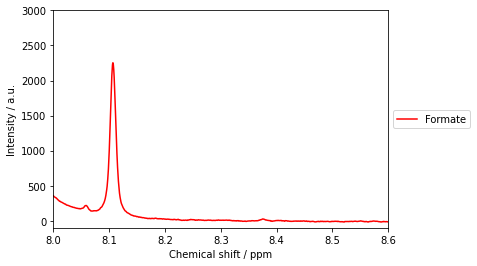

In [28]:
fig, ax = plt.subplots()
ax.plot(NMR.CS, NMR_intensity_corr_formate, "r", label='Formate')
ax.set_xlim(8.0, 8.6)
ax.set_ylim(-100, 3000)
ax.set_xlabel('Chemical shift / ppm')
ax.set_ylabel('Intensity / a.u.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [29]:
Peak_int_NMR_formate = trapz (NMR_intensity_corr_formate[P3:P4], dx = 1)
print("Formate peak area =", Peak_int_NMR_formate)

Formate peak area = 651.1096749999999


In [30]:
Ratio = Peak_int_NMR_formate/Peak_int_NMR_DCM
print("Formate/DCM =", Ratio)

Formate/DCM = 0.1666987921948257


In [31]:
Peak_int_sum = []
Peak_int_sum.append(Peak_int_NMR_formate)
Peak_int_sum.append(Peak_int_NMR_DCM)
Peak_int_sum.append(Ratio)

In [32]:
name = ["formate peak area", "DCM peak area", "formate/DCM ratio"]

In [33]:
output_data = pd.DataFrame({"name":name, "peak_area":Peak_int_sum})

In [34]:
output_data

,name,peak_area
0,formate peak area,651.109675
1,DCM peak area,3905.905174
2,formate/DCM ratio,0.166699
